# Statistics notebook with a more narrowdown approach 

Our goal with this new notebook is to get the same kind of statistics obtained in the previous notebook, but with more precise information. One may ask, how so? The idea is to create the same charts obtained previously but with an close look to small informations such as user, location, app version and etc. 

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
import json
import os
import shutil
from matplotlib import cm
import seaborn as sns
import random
from ip2geotools.databases.noncommercial import DbIpCity

%matplotlib inline

##### Plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

###### System
import sys
sys.path.append(".")
from methods import *

############ Black Jupyter Notebook ############
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

<strong>Instructions to run the notebook locally</strong>

Please set the variable `path_logs` to the path where you want to access the .logs files to be converted to .json files and saved into the project `logs` directory 

In [2]:
logs_folder = '/Users/igorlimarochaazevedo/Documents/Cellcrypt/logsSeafile/Logs/Sep2020/'

In [3]:
logs_seafile = [dI for dI in os.listdir(logs_folder) if os.path.isdir(os.path.join(logs_folder,dI))]

The idea is to copy all the .log files from one central location to a project ./logs directory. It is important to point out that the .log files we are working with are being obtained from Seafile everyday.

In [4]:
dst = './logs'
for i in logs_seafile:
    copyFiles(logs_folder + i, dst)

Methods to obtain a list of unique logs 

In [5]:
generateJsonFromLog(dst)
deleteFilesEqualNames(dst)
list_logs = returnListJSON("./logs")
print(len(list_logs))

1221


Get log dataframe with general parameters

In [6]:
df_log = getLogDF(list_logs)
print(df_log.shape)
df_log.head()

(1170, 17)


index                             alias                         peer  type  \
0      0       adam.such+andrfed@csghq.com  bobbi.such+andfed@csghq.com     1   
1      0                               NaN                          NaN     1   
2      0     windows.fed.dev@cellcrypt.com               Deena Govender     1   
3      0  philipe.schneider.win2@csghq.com     Philipe Schneider ANDFED     1   
4      0           harvey+andfed@csghq.com  rogerio.richa@cellcrypt.com     1   

                   version                      call_id  client  \
0  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com       0   
1                  3.134.0                          NaN       0   
2           3.94.0.28-CSGF                       557992       2   
3           3.95.0.35-CSGF                       514389       2   
4  101-3.131.0.3131000-FED  rogerio.richa@cellcrypt.com       0   

          address   timestamp  duration  status  \
0    174.248.27.4  1599759351      1784       7   
1             NaN           0         0      11   
2                  1601017508         4       7   
3                  1600956459         1       7   
4  197.188.173.89           0         0      11   

                       media_relay rating issue comment  \
0                              NaN    nan   nan     nan   
1                              NaN    nan   nan     nan   
2                             None    0.0   0.0     nan   
3  turn-federal.cellcrypt.com:3478    nan   nan     nan   
4                              NaN    nan   nan     nan   

                     log_session_id   id  
0                               NaN  NaN  
1                               NaN  NaN  
2                               NaN  NaN  
3  9a5e1c7cdcec4835ab7c6eaf5f0e3b2f  NaN  
4                               NaN  NaN

In [7]:
df_log_new_version = getLogDFNewVersion(list_logs)
print(df_log_new_version.shape)
df_log_new_version.head()

(363, 13)


index                        log_session_id  \
0      0      9a5e1c7cdcec4835ab7c6eaf5f0e3b2f   
1      0  D3618F12-CEF2-4B66-80FA-6FD29640CDB2   
2      0  71806CD9-619D-4E79-BF30-EC8C4E927E8A   
3      0  4824A348-8849-454D-8D4F-192A3F56A5B9   
4      0  85528B13-E4ED-4FE4-9D27-4DA18F9FD515   

                              alias                      peer  \
0  philipe.schneider.win2@csghq.com  Philipe Schneider ANDFED   
1             joao.sabino@csghq.com    j.paulo-os@hotmail.com   
2             jpaulo_os@hotmail.com     joao.sabino@csghq.com   
3             jpaulo_os@hotmail.com     joao.sabino@csghq.com   
4             joao.sabino@csghq.com     jpaulo_os@hotmail.com   

                            call_id         address  \
0                            514389                   
1  6b6f24900f1e44e9b7e4d4176b830024  189.114.198.86   
2  e8tFT1VxBpFfPAr3Ljk5I73wDgx0gacd  189.114.198.86   
3  LHmOHHUdeV.4LfKKTUmIVsu3aN54AfJY  189.114.198.86   
4  3d2zZDi.zzVP6Hlw2P.PW1GF7GvBr7uI  189.114.198.86   

                       media_relay  type  client         version   timestamp  \
0  turn-federal.cellcrypt.com:3478     1       2  3.95.0.35-CSGF  1600956459   
1  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601311451   
2  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601410845   
3  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601399570   
4  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601320134   

   duration  status  
0         1       7  
1        22       7  
2         0       8  
3        69       7  
4         0       5

The two following cells will be used to join the stats dataframe into the log dataframe

In [8]:
df_call_feedback = readCallRating(list_logs)
print(df_call_feedback.shape)
df_call_feedback.head()

(44, 5)


index                        log_session_id  rating  issue comment
0      0  4c0e7338-35f4-4770-834b-0b105f032849     5.0    NaN     NaN
1      0      c9e11e592e94443abf966d759821d35f     5.0    0.0        
2      0  3B0AC18C-86A0-413F-A750-70CC91D3C9A1     5.0    5.0   teste
3      0      dd28d7b517514d958b5beaf552cf0fdd     5.0    0.0        
4      0      2ce3bc98e3604cb9bcbf9c2fcdf9cf9e     5.0    0.0

In [9]:
df_log_new_version = joinCallFeedBackDfLog(df_call_feedback, df_log_new_version)
df_log_new_version.head()

index                        log_session_id  \
0      0      9a5e1c7cdcec4835ab7c6eaf5f0e3b2f   
1      0  D3618F12-CEF2-4B66-80FA-6FD29640CDB2   
2      0  71806CD9-619D-4E79-BF30-EC8C4E927E8A   
3      0  4824A348-8849-454D-8D4F-192A3F56A5B9   
4      0  85528B13-E4ED-4FE4-9D27-4DA18F9FD515   

                              alias                      peer  \
0  philipe.schneider.win2@csghq.com  Philipe Schneider ANDFED   
1             joao.sabino@csghq.com    j.paulo-os@hotmail.com   
2             jpaulo_os@hotmail.com     joao.sabino@csghq.com   
3             jpaulo_os@hotmail.com     joao.sabino@csghq.com   
4             joao.sabino@csghq.com     jpaulo_os@hotmail.com   

                            call_id         address  \
0                            514389                   
1  6b6f24900f1e44e9b7e4d4176b830024  189.114.198.86   
2  e8tFT1VxBpFfPAr3Ljk5I73wDgx0gacd  189.114.198.86   
3  LHmOHHUdeV.4LfKKTUmIVsu3aN54AfJY  189.114.198.86   
4  3d2zZDi.zzVP6Hlw2P.PW1GF7GvBr7uI  189.114.198.86   

                       media_relay  type  client         version   timestamp  \
0  turn-federal.cellcrypt.com:3478     1       2  3.95.0.35-CSGF  1600956459   
1  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601311451   
2  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601410845   
3  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601399570   
4  turn-federal.cellcrypt.com:3478     1       1          3.16.0  1601320134   

   duration  status  rating  issue comment  
0         1       7     NaN    NaN     NaN  
1        22       7     NaN    NaN     NaN  
2         0       8     NaN    NaN     NaN  
3        69       7     NaN    NaN     NaN  
4         0       5     NaN    NaN     NaN

In [10]:
df_log = joinCallFeedBackDfLog(df_call_feedback, df_log)
print(df_log.shape)
df_log.head()

(1170, 17)


index                             alias                         peer  type  \
0      0       adam.such+andrfed@csghq.com  bobbi.such+andfed@csghq.com     1   
1      0                               NaN                          NaN     1   
2      0     windows.fed.dev@cellcrypt.com               Deena Govender     1   
3      0  philipe.schneider.win2@csghq.com     Philipe Schneider ANDFED     1   
4      0           harvey+andfed@csghq.com  rogerio.richa@cellcrypt.com     1   

                   version                      call_id  client  \
0  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com       0   
1                  3.134.0                          NaN       0   
2           3.94.0.28-CSGF                       557992       2   
3           3.95.0.35-CSGF                       514389       2   
4  101-3.131.0.3131000-FED  rogerio.richa@cellcrypt.com       0   

          address   timestamp  duration  status  \
0    174.248.27.4  1599759351      1784       7   
1             NaN           0         0      11   
2                  1601017508         4       7   
3                  1600956459         1       7   
4  197.188.173.89           0         0      11   

                       media_relay rating issue comment  \
0                              NaN    nan   nan     nan   
1                              NaN    nan   nan     nan   
2                             None    0.0   0.0     nan   
3  turn-federal.cellcrypt.com:3478    nan   nan     nan   
4                              NaN    nan   nan     nan   

                     log_session_id   id  
0                               NaN  NaN  
1                               NaN  NaN  
2                               NaN  NaN  
3  9a5e1c7cdcec4835ab7c6eaf5f0e3b2f  NaN  
4                               NaN  NaN

Dataframes used to keep call informations through time

<strong>PS:</strong> It is crucial to note that this dataframe will contain data from both version of log files. In other words, it will contain data from the version that does not define rating properly and from the version that does define rating with two files for each call made.

In [11]:
df_call_parameters = genCallParametersDF(list_logs)
df_call_parameters = df_call_parameters.dropna()
print(df_call_parameters.shape)
df_call_parameters.head()

(180308, 14)


index  time  latency  jitter_rx  jitter_tx  packet_loss_rx  packet_loss_tx  \
0      0   0.0      0.0        0.0        0.0           100.0             0.0   
1      1   1.0      0.0        0.0        0.0           100.0             0.0   
2      2   2.0     50.0        4.0        0.0             0.0             0.0   
3      3   3.0     50.0       11.0        0.0             0.0             0.0   
4      4   4.0     50.0       12.0        0.0             0.0             0.0   

                         alias   timestamp  status       address  \
0  adam.such+andrfed@csghq.com  1599759351       7  174.248.27.4   
1  adam.such+andrfed@csghq.com  1599759351       7  174.248.27.4   
2  adam.such+andrfed@csghq.com  1599759351       7  174.248.27.4   
3  adam.such+andrfed@csghq.com  1599759351       7  174.248.27.4   
4  adam.such+andrfed@csghq.com  1599759351       7  174.248.27.4   

                   version                      call_id log_session_id  
0  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com          empty  
1  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com          empty  
2  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com          empty  
3  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com          empty  
4  101-3.131.0.3131000-FED  bobbi.such+andfed@csghq.com          empty

In [12]:
df_call_parameters_describe = df_call_parameters.describe()
df_call_parameters_describe = df_call_parameters_describe[['latency', 
                                                           'jitter_rx', 
                                                           'jitter_tx', 
                                                           'packet_loss_tx', 
                                                           'packet_loss_rx']]
df_call_parameters_describe = df_call_parameters_describe.iloc[1:, :]
df_call_parameters_describe

latency  jitter_rx  jitter_tx  packet_loss_tx  packet_loss_rx
mean   139.842741  11.933575  13.758752        0.773332        0.924490
std    109.268399   6.918624   4.691872        2.610925        7.023514
min      0.000000  -1.000000   0.000000        0.000000       -1.000000
25%     36.000000   7.000000  13.000000        0.000000        0.000000
50%    166.000000  15.000000  15.000000        0.000000        0.000000
75%    215.000000  16.000000  16.000000        0.000000        0.000000
max   1368.000000  79.000000  52.000000      100.000000      100.000000

In [13]:
df_call_parameters_NV = genCallParametersDFNewVersion(list_logs)
df_call_parameters_NV = df_call_parameters_NV.dropna()
print(df_call_parameters_NV.shape)
df_call_parameters_NV.head()

(12252, 14)


index  time  latency  jitter_rx  jitter_tx  packet_loss_rx  packet_loss_tx  \
0      0   1.0      1.0       12.0        0.0             0.0             0.0   
1      0   1.0      2.0       12.0        0.0             0.0             0.0   
2      1   2.0      2.0       11.0        0.0             0.0             0.0   
3      2   3.0      2.0       10.0        0.0             0.0             0.0   
4      3   4.0      2.0       10.0        0.0             0.0             0.0   

                              alias   timestamp  status         address  \
0  philipe.schneider.win2@csghq.com  1600956459       7                   
1             joao.sabino@csghq.com  1601311451       7  189.114.198.86   
2             joao.sabino@csghq.com  1601311451       7  189.114.198.86   
3             joao.sabino@csghq.com  1601311451       7  189.114.198.86   
4             joao.sabino@csghq.com  1601311451       7  189.114.198.86   

          version                           call_id  \
0  3.95.0.35-CSGF                            514389   
1          3.16.0  6b6f24900f1e44e9b7e4d4176b830024   
2          3.16.0  6b6f24900f1e44e9b7e4d4176b830024   
3          3.16.0  6b6f24900f1e44e9b7e4d4176b830024   
4          3.16.0  6b6f24900f1e44e9b7e4d4176b830024   

                         log_session_id  
0      9a5e1c7cdcec4835ab7c6eaf5f0e3b2f  
1  D3618F12-CEF2-4B66-80FA-6FD29640CDB2  
2  D3618F12-CEF2-4B66-80FA-6FD29640CDB2  
3  D3618F12-CEF2-4B66-80FA-6FD29640CDB2  
4  D3618F12-CEF2-4B66-80FA-6FD29640CDB2

## How many calls were made per alias

In [14]:
def getHowManyCallsPerAlias(df_log):
    df = df_log.copy()
    print('Amount od nans: ', df['alias'].isnull().sum().sum())
    return df.groupby('alias').count()
df_how_many_calls = getHowManyCallsPerAlias(df_log)
print(df_how_many_calls.shape)
print(sum(df_how_many_calls['index']))
df_how_many_calls

Amount od nans:  139
(39, 16)
1031


index  peer  type  version  call_id  client  \
alias                                                                           
adam.such+andrfed@csghq.com          77    77    77       77       77      77   
auto.alice@csghq.com                  1     1     1        1        1       1   
bob@csghq.com                        43    43    43       43       43      43   
bobbi+winfed@csghq.com                2     2     2        2        2       2   
bobbi.such+andfed@csghq.com          35    35    35       35       35      35   
delta@csghq.com                       1     1     1        1        1       1   
fabio.ohtsuki+andfed@csghq.com       29    29    29       29       29      29   
greg+andfed@csghq.com                 4     4     4        4        4       4   
greg+winfed@csghq.com                18    18    18       18       18      18   
gustavo.gava@csghq.com               42    42    42       42       42      42   
harvey+andfed@csghq.com             117   117   117      117      117     117   
harvey+winfed@csghq.com              10    10    10       10       10      10   
harvey2+iosfed@csghq.com              2     2     2        2        2       2   
henrique.prandi@csghq.com             3     3     3        3        3       3   
henry@cellcrypt.com                   7     7     7        7        7       7   
henry@seecrypt.com                    4     4     4        4        4       4   
j.paulo-os@hotmail.com               38    38    38       38       38      38   
jessica.souza@csghq.com               2     2     2        2        2       2   
jessica_schelly@hotmail.com          12    12    12       12       12      12   
jessicaschellysouza@gmail.com        76    76    76       76       76      76   
joao.sabino@csghq.com                85    85    85       85       85      85   
jorge.ramos@csghq.com                 1     1     1        1        1       1   
jpaulo_os@hotmail.com                59    59    59       59       59      59   
juliano.zatta@csghq.com              10    10    10       10       10      10   
marcus.chaves@csghq.com              39    39    39       39       39      39   
mark.currie@cellcrypt.com            10    10    10       10       10      10   
paul.parke+winfed@csghq.com           1     1     1        1        1       1   
pedro.lenzi@csghq.com                 5     5     5        5        5       5   
philipe.schneider.win2@csghq.com     36    36    36       36       36      36   
philipe.schneider.win@csghq.com       9     9     9        9        9       9   
philipe.schneider@csghq.com          54    54    54       54       54      54   
ricardo.heffel+win@csghq.com         44    44    44       44       44      44   
ricardo.heffel@csghq.com              7     7     7        7        7       7   
rogerio.richa+win@cellcrypt.com       8     8     8        8        8       8   
rogerio.richa@cellcrypt.com          81    81    81       81       81      81   
veronica+winfed@csghq.com             3     3     3        3        3       3   
vitor.monticelli@csghq.com           30    30    30       30       30      30   
william.nunes@csghq.com               9     9     9        9        9       9   
windows.fed.dev@cellcrypt.com        17    17    17       17       17      17   

                                  address  timestamp  duration  status  \
alias                                                                    
adam.such+andrfed@csghq.com            76         77        77      77   
auto.alice@csghq.com                    1          1         1       1   
bob@csghq.com                          43         43        43      43   
bobbi+winfed@csghq.com                  2          2         2       2   
bobbi.such+andfed@csghq.com            35         35        35      35   
delta@csghq.com                         1          1         1       1   
fabio.ohtsuki+andfed@csghq.com         29         29        29      29   
greg+andfed@csghq.com                   4     

## Groupby Rating 
This cell is just to get an ideia of how the logs are behaving in rating point of view

In [15]:
def PlotRatingBarChart(df_log_new_version):
    df_call_rating_NV = df_log_new_version.groupby('rating').count()
    
    fig = px.bar(df_call_rating_NV, x=df_call_rating_NV.index, y='peer', 
             width=800, height=350)

    fig.update_layout(
        title="Rating bar chart",
        xaxis_title="Rating",
        yaxis_title="Quantity",
        font=dict(
            family="Courier New, monospace",
            size=18
        )
    )

    fig.show()
PlotRatingBarChart(df_log_new_version)

## Rating

#### Average Rating per alias

In [16]:
def getRatingPerAlias(df_log_new_version):
    df_alias_NV = df_log_new_version.groupby('alias').mean()
    df_alias_NV['How many calls'] = df_log_new_version.groupby('alias').count()['index']
    df_ = df_log_new_version[df_log_new_version['rating'].notna()]
    df_alias_NV['How many call with rating provided'] = df_.groupby('alias').count()['index']
    df_alias_NV['How many call with rating provided'] = df_alias_NV['How many call with rating provided'].fillna(0)
    print(df_alias_NV.shape)
    df_alias_NV = df_alias_NV[['rating', 'How many calls', 'How many call with rating provided']]
    df_alias_NV = df_alias_NV.sort_values(by=['How many call with rating provided'])
    
    return df_alias_NV

df_alias_NV = getRatingPerAlias(df_log_new_version)
df_alias_NV

(15, 10)


rating  How many calls  \
alias                                                        
bob@csghq.com                          NaN              43   
delta@csghq.com                        NaN               1   
gustavo.gava@csghq.com                 NaN              42   
j.paulo-os@hotmail.com                 NaN               1   
joao.sabino@csghq.com                  NaN              85   
jpaulo_os@hotmail.com                  NaN              59   
pedro.lenzi@csghq.com                  NaN               5   
harvey2+iosfed@csghq.com          5.000000               2   
jessica.souza@csghq.com           0.000000               2   
jessicaschellysouza@gmail.com     5.000000              76   
rogerio.richa+win@cellcrypt.com   5.000000               3   
greg+winfed@csghq.com             4.250000               4   
rogerio.richa@cellcrypt.com       5.000000               7   
ricardo.heffel+win@csghq.com      4.500000              13   
philipe.schneider.win2@csghq.com  4.692308              20   

                                  How many call with rating provided  
alias                                                                 
bob@csghq.com                                                    0.0  
delta@csghq.com                                                  0.0  
gustavo.gava@csghq.com                                           0.0  
j.paulo-os@hotmail.com                                           0.0  
joao.sabino@csghq.com                                            0.0  
jpaulo_os@hotmail.com                                            0.0  
pedro.lenzi@csghq.com                                            0.0  
harvey2+iosfed@csghq.com                                         1.0  
jessica.souza@csghq.com                                          1.0  
jessicaschellysouza@gmail.com                                    3.0  
rogerio.richa+win@cellcrypt.com                                  3.0  
greg+winfed@csghq.com                                            4.0  
rogerio.richa@cellcrypt.com                                      4.0  
ricardo.heffel+win@csghq.com                                    12.0  
philipe.schneider.win2@csghq.com                                13.0

#### Plot how many calls, and how many calls with rating provided were made

In [17]:
def plotHowMany(df_alias_NV):
    alias_arr = getAliasArr(df_alias_NV.reset_index())
            
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=alias_arr,
        y=df_alias_NV['How many calls'],
        name='How many calls were made',
        marker_color='indianred'
    ))
    
    fig.add_trace(go.Bar(
        x=alias_arr,
        y=df_alias_NV['How many call with rating provided'],
        name='How many calls with rating provided',
        marker_color='lightsalmon'
    ))

    fig.update_layout(title_text="Relation between calls made and ratings provided")
    fig.show()
plotHowMany(df_alias_NV)

In [18]:
def plotInfoPerAlias(df, info, path):
    df = df.dropna(subset=['alias'])
    alias_arr = getAliasArr(df)
    
    rows = int(len(alias_arr)/2 + len(alias_arr)%2)
    cols = 2
    fig = make_subplots(rows=rows, cols=cols, 
                    subplot_titles=alias_arr)

    k = 0
    empty_count = 0
    for i in range(rows):
        for j in range(cols):
        
            df_ = df[df['alias'] == alias_arr[k]]
            df_ = df_.groupby(info).count()
            
            alias = str(alias_arr[k])
            fig.add_trace(go.Bar(
                x=df_.index,
                y=df_['index'],
                text=df_['index'],
                marker_color='rgb(55, 83, 109)',
                name=alias.split('@')[0],
                textposition='auto',
            ), row=i+1, col=j+1)

            fig.update_yaxes(visible=False, showticklabels=False, row=i+1, col=j+1)
            fig.update_xaxes(type='category',  row=i+1, col=j+1)

            if k < len(alias_arr)-1:
                k+=1
    
    fig.update_layout(height=2500, width=800, title_text="{} per alias".format(info), 
                      showlegend=False)
    fig.write_image(path)
    fig.show()

#### Rating bar chart per alias

In [19]:
plotInfoPerAlias(df_log_new_version, 'rating', './images/ChartsPerUser/Rating/rating.png')

## Status

- 0: Busy
- 1: Cancelled
- 2: Rejected
- 3: Unsupported Crypto
- 4: Unsupported Codecs
- 5: Error
- 6: Answered Elsewhere
- 7: End call (success)
- 8: Callee Offline
- 9: Lost Connection
- 10: Timeout
- 11: No Answer

#### Groupby status per alias

In [20]:
plotInfoPerAlias(df_log, 'status', './images/ChartsPerUser/Status/status.png')

## Latency

#### Latency per alias

In [21]:
def getTimeStampArr(df):
    timestamp_arr = []
    for time in df['timestamp'].tolist():
        if time not in timestamp_arr:
            timestamp_arr.append(time)
    return timestamp_arr

In [22]:
def plotLatencyPerAlias_OldVersion(df, df_log, parameter, figsize):
    path = ''
    alias_arr = getAliasArr(df)
    
    ylabel=''
    if parameter == 'packet_loss_rx' or parameter == 'packet_loss_tx':
        ylabel = '%(percentage)'
    else:
        ylabel = 'milliseconds'
    
    rows = int(len(alias_arr)/2 + len(alias_arr)%2)
    cols = 2
    fig, axs = plt.subplots(rows, cols, figsize=figsize, dpi=80)
    fig.subplots_adjust(top=1.5)

    k=0
    for i in range(rows):
        for j in range(cols):
            df_ = df.loc[lambda df: df['alias'] == alias_arr[k]]
            df_log_ = df_log.loc[lambda df_log: df_log['alias'] == alias_arr[k]]
                     
            timesta_arr = getTimeStampArr(df_log_)

            for timestamp in timesta_arr:
                df_timestamp = df_.loc[lambda df_: df_['timestamp'] == timestamp]
                df_timestamp = df_timestamp[['timestamp', 'time', parameter]]
                axs[i, j].plot(df_timestamp['time'], df_timestamp[parameter], 
                               color='cornflowerblue')
            
                
            ## Simple Average
            df_avg = df_.groupby('time').mean()
            axs[i, j].plot(df_avg.index, df_avg[parameter], 
                           label='Average ' + parameter, color='blueviolet')
            
            ## Plot literature reference
            if parameter == 'latency':
                path = './images/ChartsPerUser/LatencyPerUser/latency_per_user.png'
                axs[i, j].axhline(y=150, label='Literature reference', color='red')
            elif parameter == 'jitter_tx' or parameter == 'jitter_rx':
                if parameter == 'jitter_tx':
                    path = './images/ChartsPerUser/JitterTxPerUser/jitter_tx_per_user.png'
                else:
                    path = './images/ChartsPerUser/JitterRxPerUser/jitter_rx_per_user.png'
                    
                axs[i, j].axhline(y=4.9, label='Excellent-to-Good', color='darkgreen')
                axs[i, j].axhline(y=6.5, label='Good-to-Fair', color='darkorange')
            elif parameter == 'packet_loss_tx' or parameter == 'packet_loss_rx':
                if parameter == 'packet_loss_tx':
                    path = './images/ChartsPerUser/PacketLossTxPerUser/packet_loss_tx_per_user.png'
                else:
                    path = './images/ChartsPerUser/PacketLossRxPerUser/packet_loss_rx_per_user.png'
                
                axs[i, j].axhline(y=9.5, label='Excellent-to-Good', color='darkgreen')
                axs[i, j].axhline(y=14, label='Good-to-Fair', color='darkorange')
            
            ## Chart layout
            axs[i, j].set(xlabel='time (s)', ylabel=ylabel)
            axs[i, j].set_title(parameter + ' - ' + alias_arr[k].split('@')[0])
            axs[i, j].legend()
            
            k+=1
    
    fig.tight_layout()
    fig.savefig(path)
    plt.show()

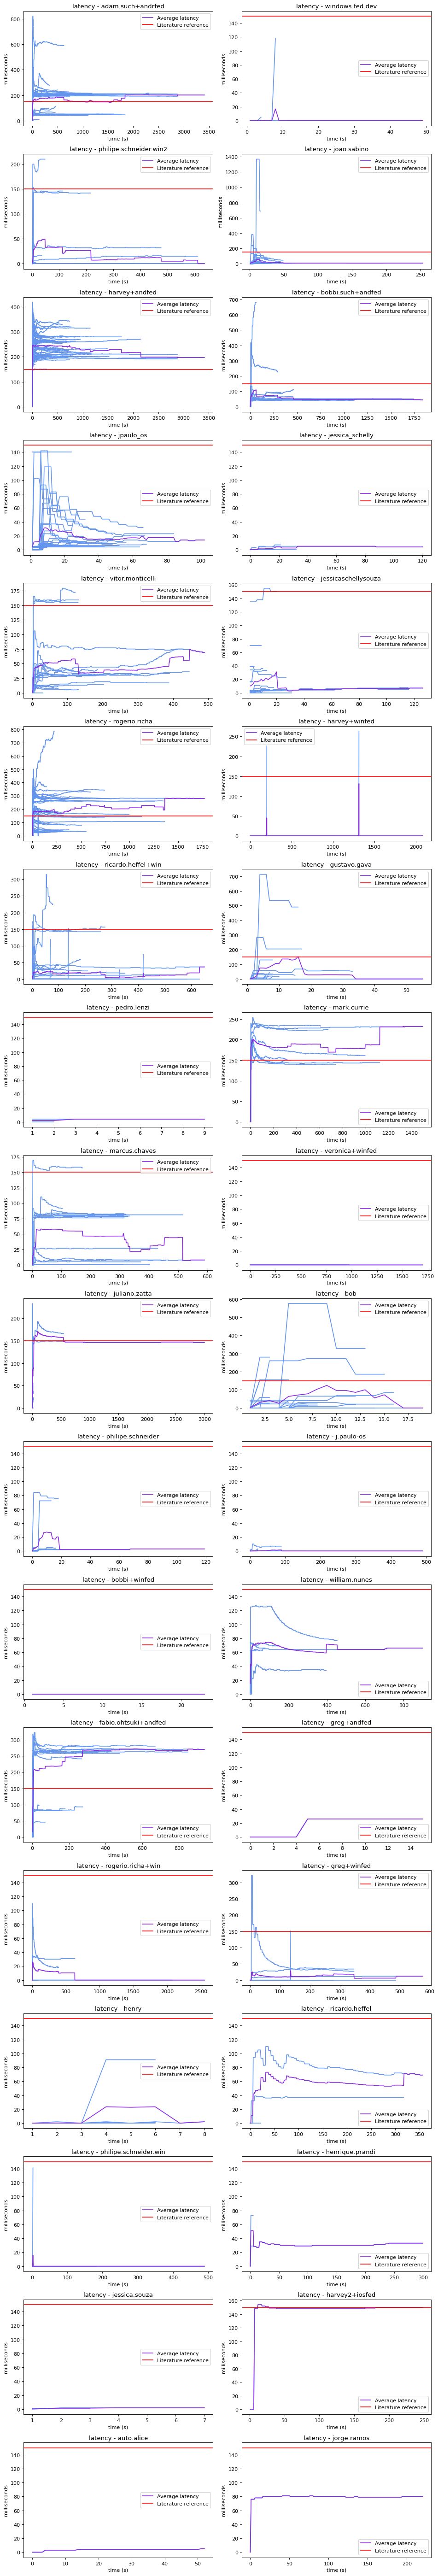

In [23]:
figsize = (12, 70)
parameter = 'latency'
plotLatencyPerAlias_OldVersion(df_call_parameters, df_log, parameter, figsize)

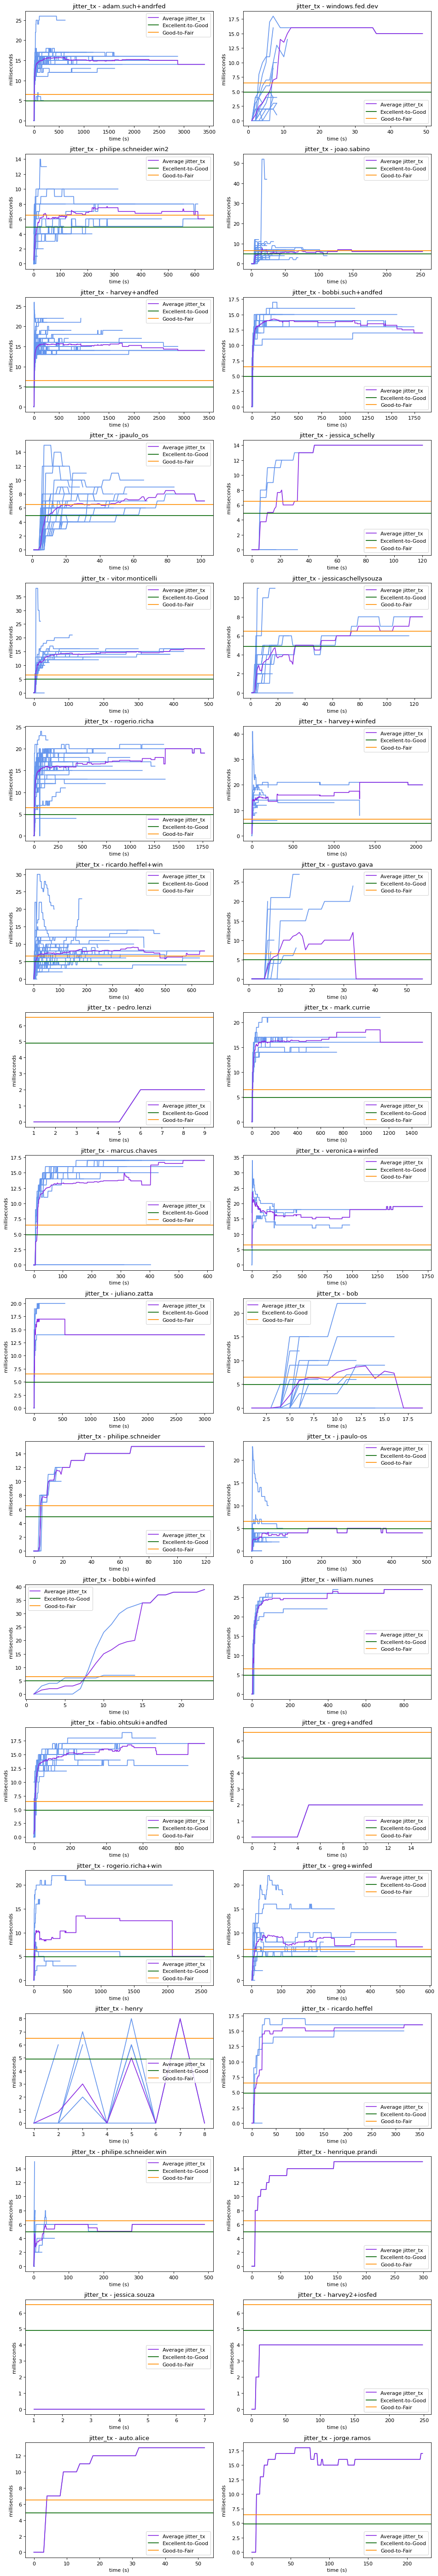

In [24]:
figsize = (12, 70)
parameter = 'jitter_tx'
plotLatencyPerAlias_OldVersion(df_call_parameters, df_log, parameter, figsize)

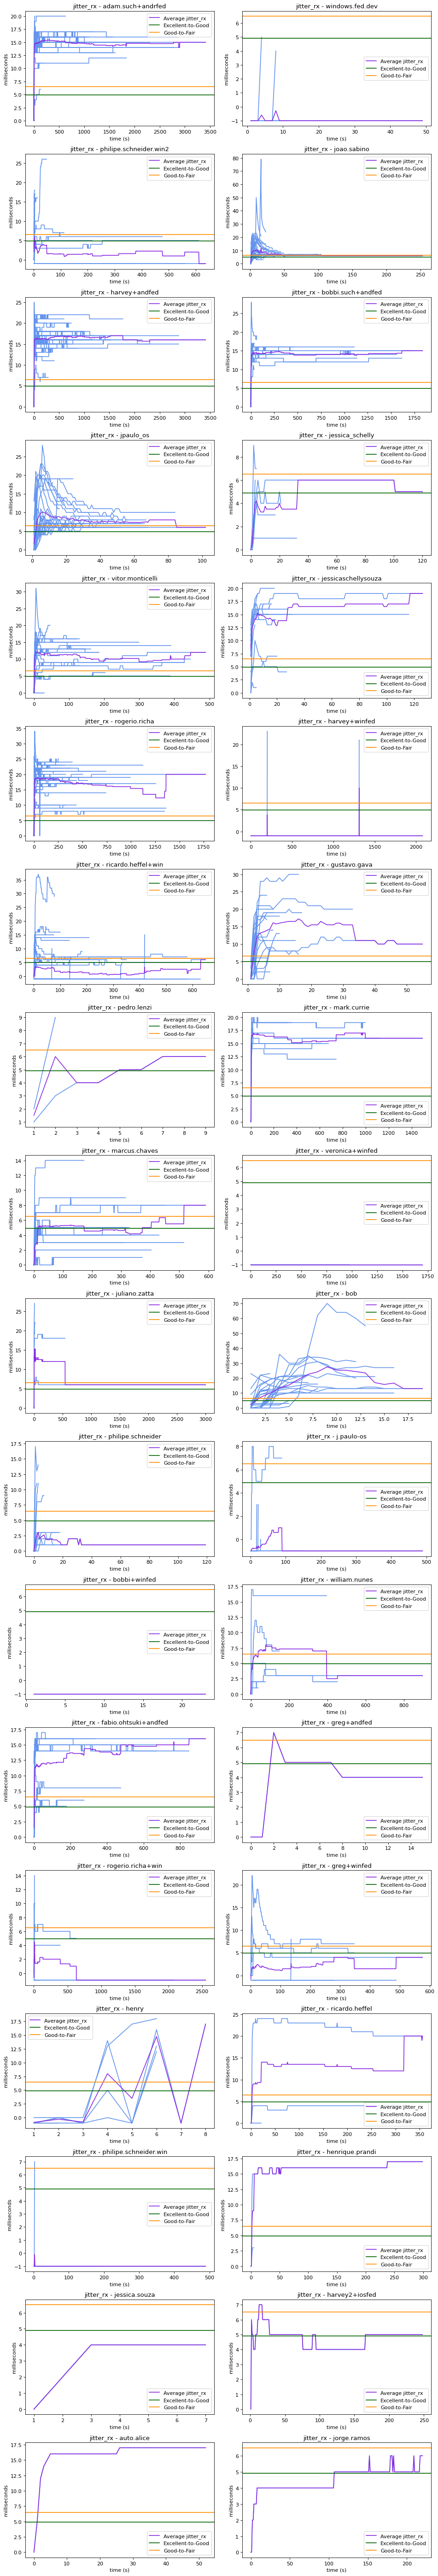

In [25]:
figsize = (12, 70)
parameter = 'jitter_rx'
plotLatencyPerAlias_OldVersion(df_call_parameters, df_log, parameter, figsize)

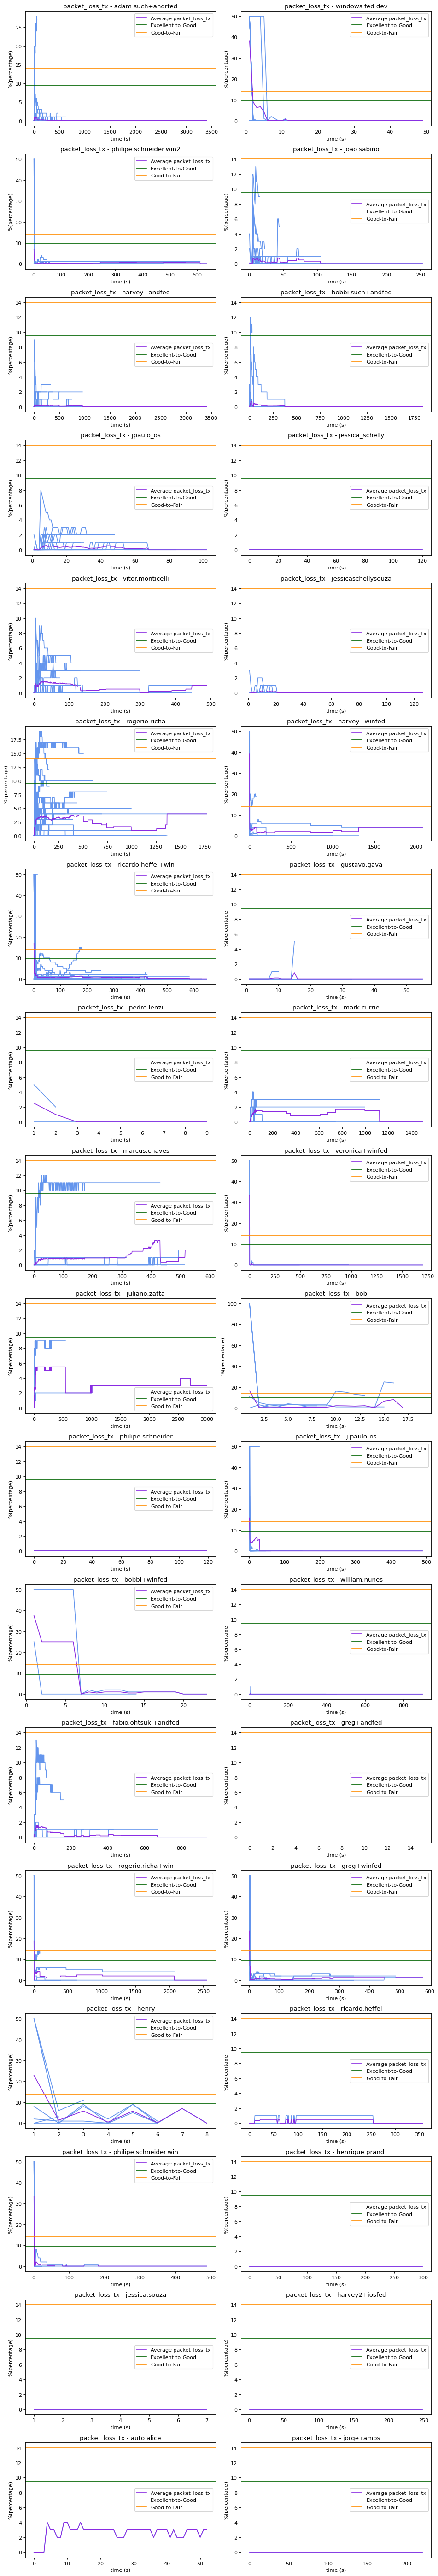

In [26]:
figsize = (12, 70)
parameter = 'packet_loss_tx'
plotLatencyPerAlias_OldVersion(df_call_parameters, df_log, parameter, figsize)

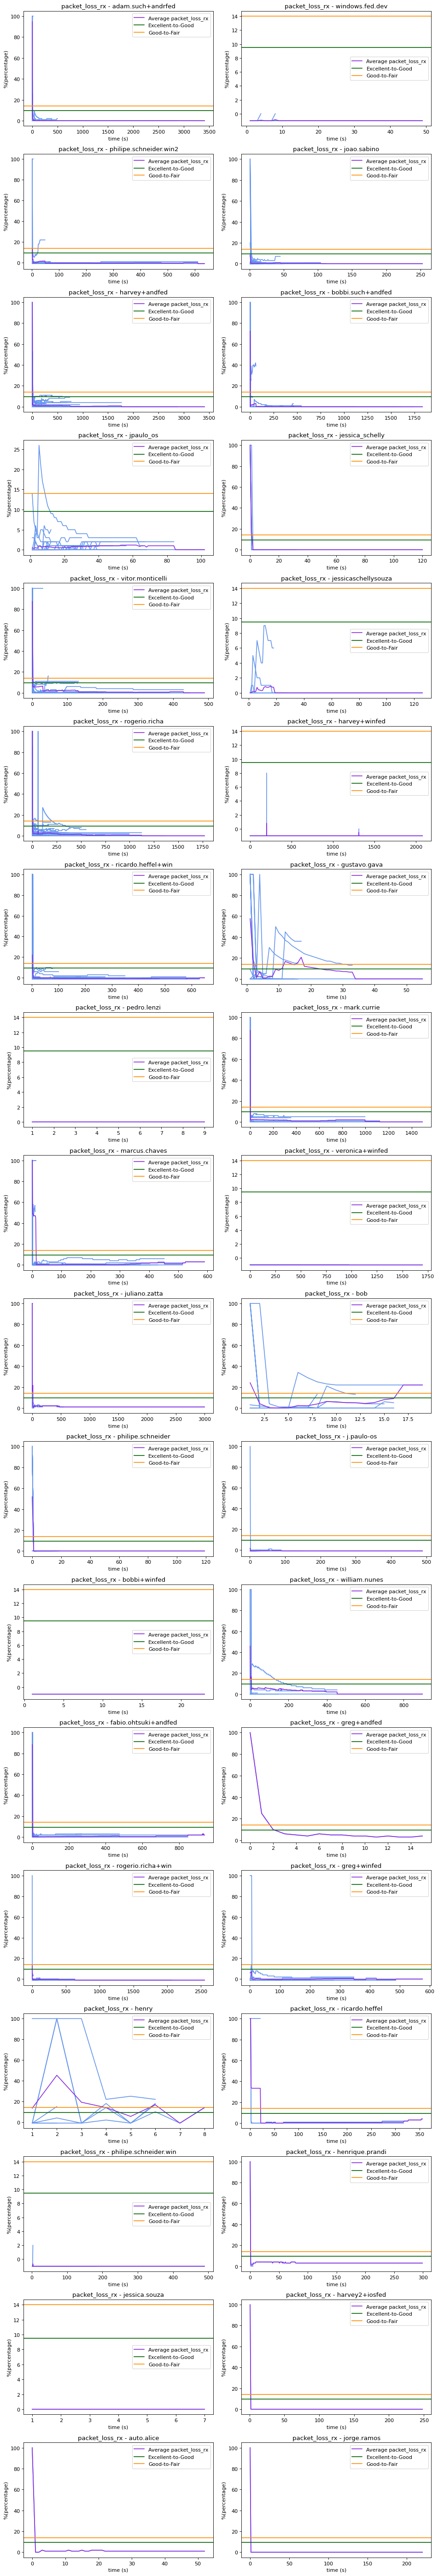

In [27]:
figsize = (12, 70)
parameter = 'packet_loss_rx'
plotLatencyPerAlias_OldVersion(df_call_parameters, df_log, parameter, figsize)

## More detailed information about jitter, packet loss and latency

The goal is to order the dataframe based on the parameter being analysed and on the alias as well. Therefore it will be possible to get std, first, second and third quartile, average, min and max per parameter and per alias.

In [28]:
def set4CallsPerAlias(df_call_parameters, parameter, 
                         type_position, minimun_time_minutes, alias):
    df_ = df_call_parameters.groupby(by=['alias', 'timestamp'])\
            .max().sort_values(by=['time'])
    
    df_call_parameters = df_call_parameters[df_call_parameters['alias'] == alias]
    
    if type_position == 'best':
        df = df_call_parameters.groupby(by=['alias', 'timestamp'])\
                .mean().sort_values(by=[parameter])
        df['max_time'] = df_['time']
        df = df[df['max_time'] > minimun_time_minutes*60][parameter]
        df = df[df.iloc[:] > 0.0].iloc[0:4]
        
    elif type_position == 'worst':
        df = df_call_parameters.groupby(by=['alias', 'timestamp'])\
                .mean().sort_values(by=[parameter], ascending=False)
        df['max_time'] = df_['time']
        df = df[df['max_time'] > minimun_time_minutes*60][parameter]
        df = df[df.iloc[:] > 0.0].iloc[0:4]
        
    elif type_position == 'median':
        df = df_call_parameters.groupby(by=['alias', 'timestamp'])\
                .mean().sort_values(by=[parameter])
        df['max_time'] = df_['time']
        df = df[df['max_time'] > minimun_time_minutes*60][parameter]
        middle_pos = int(df.shape[0]/2)
        df = df.iloc[middle_pos:middle_pos+4]
        
    elif type_position == 'first_quartile':
        df = df_call_parameters.groupby(by=['alias', 'timestamp'])\
                .mean().sort_values(by=[parameter])
        df['max_time'] = df_['time']
        df = df[df['max_time'] > minimun_time_minutes*60][parameter]
        first_quartile = int(df.shape[0]/4)
        df = df.iloc[first_quartile:first_quartile+4]
    
    elif type_position == 'third_quartile':
        df = df_call_parameters.groupby(by=['alias', 'timestamp'])\
                .mean().sort_values(by=[parameter])
        df['max_time'] = df_['time']
        df = df[df['max_time'] > minimun_time_minutes*60][parameter]
        third_quartile = int(df.shape[0]/2 + df.shape[0]/4)
        df = df.iloc[third_quartile:third_quartile+4]
    return df

def get4CallsPerAlias(alias):
    ### We are selecting calls with minimun one minute length
    arr_options = ['best', 'first_quartile', 'median', 'third_quartile', 'worst']
    arr_parameter = ['latency', 'jitter_tx', 'jitter_rx', 'packet_loss_tx', 'packet_loss_rx']

    arr_df_latency = []
    arr_df_jitter_tx = []
    arr_df_jitter_rx = []
    arr_df_packet_loss_tx = []
    arr_df_packet_loss_rx = []
    arr_arr = [arr_df_latency, arr_df_jitter_tx, arr_df_jitter_rx, 
                  arr_df_packet_loss_tx, arr_df_packet_loss_rx]

    for i, parameter in enumerate(arr_parameter):
        for opt in arr_options:
            arr_arr[i].append(set4CallsPerAlias(df_call_parameters, parameter, opt, 1, alias))
    return arr_arr

In [38]:
def plotParameter(df_, df_call_parameters, title, parameter_to_plot, 
                  figsize, MA, alias, save_name, show=''):
    
    '''This function will receive the df_ filtered with tha data you want to plot. The format
    of such parameter should be shape[0] == 4, since we are creating a figure with 4 charts'''
    
    ylabel=''
    if parameter_to_plot == 'packet_loss_rx' or parameter_to_plot == 'packet_loss_tx':
        ylabel = '%(percentage)'
    else:
        ylabel = 'milliseconds'
    
    x_lim = 1000000
    
    alias_timestamp = []
    for i in range(df_.shape[0]):
        alias_timestamp.append((df_.index[i][0], df_.index[i][1]))
    
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    
    k=0
    amount_of_empty_arrs = 0
    for i in range(2):
        for j in range(2):
            
            if k >= len(alias_timestamp):
                break
                
            if(len(alias_timestamp) == 0):
                amount_of_empty_arrs += 1
            
            ## The reason for this IF is beacuse we stablish a minimum call duration
            ##     condition if the file does not satisfy this condition its length will
            ##     be equal to 0 and therefore there is no reason to plot such data. 
            elif(len(alias_timestamp) != 0):
                df = getOneFile(df_call_parameters, alias_timestamp[k][0], alias_timestamp[k][1])

                ## Moving Average MA elements
                df_moving_avg = df.copy()
                df_moving_avg[parameter_to_plot+'_'+str(MA)] = df[parameter_to_plot]\
                                .rolling(MA, min_periods=1).mean()
                df_moving_avg.set_index('time', inplace=True)
                axs[i, j].plot(df_moving_avg.index, df_moving_avg[parameter_to_plot+'_'+str(MA)],
                                label='MA_'+str(MA)+'_'+df['alias'].iloc[0].split('@')[0], 
                                color='blue')

                ## Simple Average
                df_ = df_call_parameters.groupby('time').mean()
                axs[i, j].plot(df_.index, df_[parameter_to_plot], 
                               label='Average ' + parameter_to_plot, color='red')

                ## Simple Average per alias
                df_ = df_call_parameters[df_call_parameters['alias'] == alias]
                df_ = df_.groupby('time').mean()
                axs[i, j].plot(df_.index, df_[parameter_to_plot], 
                            label='Average ' + parameter_to_plot + ' - ' + alias.split('@')[0], 
                            color='purple')

                ## Plot literature reference
                if parameter_to_plot == 'latency':
                    path = './images/ChartsPerAlias/{}/Latency/latency_{}.png'.format(alias, save_name)
                    axs[i, j].axhline(y=150, label='Literature reference', color='pink')
                elif parameter_to_plot == 'jitter_tx' or parameter_to_plot == 'jitter_rx':
                    if parameter_to_plot == 'jitter_tx':
                        path = './images/ChartsPerAlias/{}/JitterTx/jitter_tx_{}.png'.format(alias, save_name)
                    else:
                        path = './images/ChartsPerAlias/{}/JitterRx/jitter_rx_{}.png'.format(alias, save_name)

                    axs[i, j].axhline(y=4.9, label='Excellent-to-Good', color='darkgreen')
                    axs[i, j].axhline(y=6.5, label='Good-to-Fair', color='darkorange')
                elif parameter_to_plot == 'packet_loss_tx' or parameter_to_plot == 'packet_loss_rx':
                    if parameter_to_plot == 'packet_loss_tx':
                        path = './images/ChartsPerAlias/{}/PacketLossTx/packet_loss_tx_{}.png'.format(alias, save_name)
                    else:
                        path = './images/ChartsPerAlias/{}/PacketLossRx/packet_loss_rx_{}.png'.format(alias, save_name)

                    axs[i, j].axhline(y=9.5, label='Excellent-to-Good', color='darkgreen')
                    axs[i, j].axhline(y=14, label='Good-to-Fair', color='darkorange')

                ## Chart layout
                axs[i, j].set(xlabel='time (s)', ylabel=ylabel)
                axs[i, j].set_title(parameter_to_plot)
                axs[i, j].set_xlim(0, df.shape[0])
                axs[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                k += 1
        
                
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    
    if(len(alias_timestamp) != 0):
        fig.savefig(path)
        
    if show != 'n':
        plt.show()
        
    elif show == 'n':
        plt.close(fig)
    
    return amount_of_empty_arrs

In [39]:
def getLabels(parameter):
    labels = []
    labels.append('GREAT {}'.format(parameter))
    labels.append('FIRST quartile {}'.format(parameter))
    labels.append('Median {}'.format(parameter))
    labels.append('THIRD quartile {}'.format(parameter))
    labels.append('BAD {}'.format(parameter))
    return labels

Several folders will be created  with unique aliasas names from our files. The idea is to save all charts into those folders and keep track of the information it was obtained per alias 

In [40]:
createAliasFolders(df_log)

Since it is desired to plot the information per alias, it is necessary to get an array with all unique alias from our files

In [41]:
alias_arr = getAliasArr(df_log)

In [42]:
def plotAlias(parameter, alias, figszize=(10,7), moving_average=1, show='n'):
    arr_arr = get4CallsPerAlias(alias)
    pos_names = ['1_good', '2_first_quartile', '3_median', '4_third_quartile', '5_bad']

    flag_sum = 0;
    if parameter == 'latency':
        arr_plot = arr_arr[0] # 0 - latency
    elif parameter == 'jitter_tx':
        arr_plot = arr_arr[1] # 1 - jitter_tx
    elif parameter == 'jitter_rx':
        arr_plot = arr_arr[2] # 2 - jitter_rx
    elif parameter == 'packet_loss_tx':
        arr_plot = arr_arr[3] # 3 - packet_loss_tx
    elif parameter == 'packet_loss_rx':
        arr_plot = arr_arr[4] # 4 - packet_loss_rx
        
    labels = getLabels(parameter);
    for i, label in enumerate(labels):
        flag_sum += plotParameter(arr_plot[i], df_call_parameters, label, parameter, 
                      figszize, moving_average, alias, pos_names[i], show) 
    return flag_sum

Latency

In [43]:
import time
start = time.time()
total = 0
charts_empty = 0
for alias in alias_arr:
    try:
        flag_sum = plotAlias('latency', alias, figszize=(17,7), moving_average=1, show='n')
        charts_empty += flag_sum
        if(flag_sum != 0):
            total += 1
    except:
        print('Unsuccessful chart creation: ', alias)
end = time.time()
total_time = (end - start)/60
print('Time to execute the loop above: {} minutes'.format(total_time))
print("The amount of empty dataframes provided"+
      " because they did not satisfied the minimum call duration is: ", total)
print("Amount of empty charts: ", charts_empty)

Unsuccessful chart creation:  nan
Time to execute the loop above: 8.836131731669107 minutes
The amount of empty dataframes provided because they did not satisfied the minimum call duration is:  0
Amount of empty charts:  0
